# 集成学习简介

&emsp;&emsp;集成学习通过建⽴⼏个模型来解决单⼀预测问题。它的⼯作原理是⽣成多个分类器/模型，各⾃独⽴地学习和作出预测。这些预测最后结合成组合预测，因此优于任何⼀个单分类的做出预测。（相当于推荐英雄主义，更倾向于三个臭皮匠顶个诸葛亮）

- 机器学习的两个核心任务：
    - （1）如何优化训练数据——>主要解决欠拟合问题
        - 弱弱组合变强
        - boosting逐步增强学习
    - （2）如何提升泛化性能——>主要解决过拟合问题
        - 相互扼制变壮
        - Bagging采样学习集成

# Bagging和随机森林
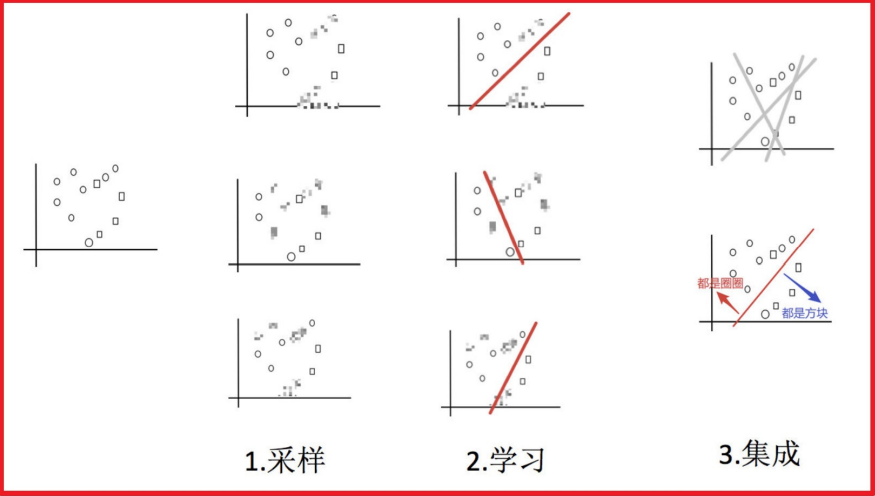

## Bagging集成原理
- 1.采样：从所有样本里面，采样一部分
- 2.学习：训练弱学习器
- 3.集成：使用平均投票
- 简单来说，就是随机训练几个，然后在里面选出一个比较好的

## 随机森林介绍

- 定义：随机森林=Bagging+决策树
- 流程：
    - 1.随机选取m条数据
    - 2.随机选取k个特征
    - 3.训练决策树
    - 4.重复1~3
    - 5.对上面的偌决策树进行平均投票

- 注意：
    - 1.随机选取样本，且是有放回的抽取
    - 2.选取随机m个特征，m<<M（M是所有的特征数）

## 包外估计（Out-of-Bag Estimate）

在随机森林构造过程中，如果进⾏有放回的抽样，我们会发现，总是有⼀部分样本我们选不到。
- 这部分数据，占整体数据的⽐重有多⼤呢？
- 这部分数据有什么⽤呢？

用途：
- （1）当基学习器是决策树时，可使⽤包外样本来辅助剪枝 ，或⽤于估计决策树中各结点的后验概率以辅助对零训练样本结点的处理；
- （2）当基学习器是神经⽹络时，可使⽤包外样本来辅助早期停⽌以减⼩过拟合 。

## 随机森林api

sklearn.ensemble.RandomForestClassifier()

## Bagging集成优点
Bagging + 决策树/线性回归/逻辑回归/深度学习… = bagging集成学习⽅法

- 1.均可在原有算法上提⾼约2%左右的泛化正确率
- 2.简单, ⽅便, 通⽤

# Boosting

- 什么是bootsing？
    - 随着学习的积累从弱到强（每新加一个若学习器，整体能力就会得到提升）
- 代表算法：
    - Adaboost，GBDT，XGBoost，LightGBM

## bagging集成与boosting集成的区别

- （1）数据方面
    - Bagging：对数据进行采样训练
    - Boosting：根据前一轮学习结果调整数据的重要性
- （2）投票方面：
    - Bagging：所有学习器平权投票
    - Boosting：对学习器进行加权投票
- （3）学习顺序：
    - Bagging：学习是并行的，每个学习器没有依赖关系
    - Boosting：学习是串行的，学习有先后顺序
- （4）主要作用：
    - Bagging：主要用于提高泛化性能（解决过拟合，也可以说是降低方差）
    - Boosting：主要用于提高训练精度（解决欠拟合，也可以说是降低偏差）

## AdaBoost介绍

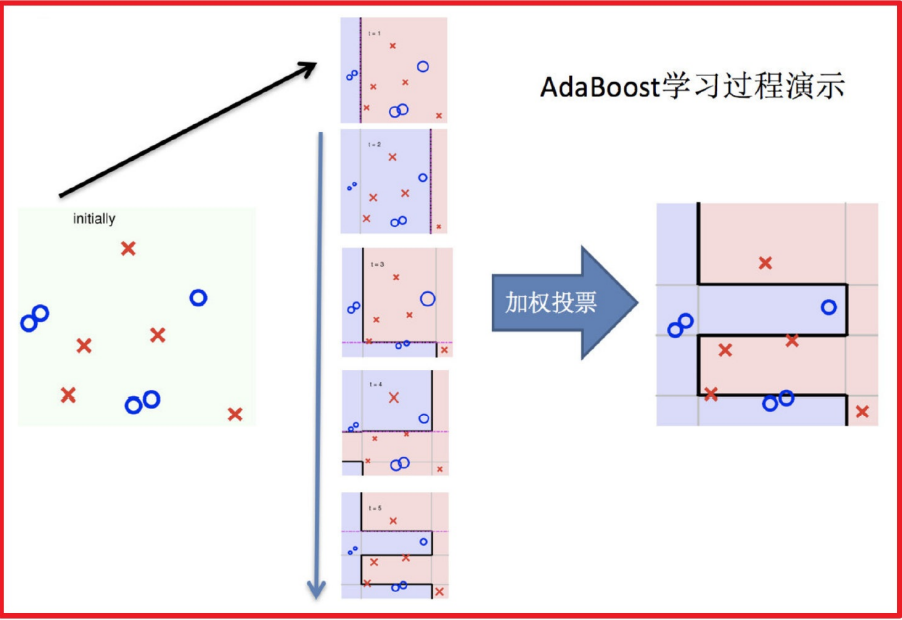

AdaBoost构造过程：
- 初始化训练数据权重相等，训练第⼀个学习器
- AdaBoost反复学习基本分类器
- 对m个学习器进⾏加权投票
- 注意：每轮训练，调整数据分布，将训练注意力放在错误数据上

***
# GBDT介绍

&emsp;&emsp;GBDT 的全称是 Gradient Boosting Decision Tree，梯度提升树，在传统机器学习算法中，GBDT算的上TOP3的算法。解GBDT中的Gradient Boosting 和Decision Tree分别是“梯度提升”和“决策树”。

## Decision Tree：CART回归树
&emsp;&emsp;⾸先，GBDT使⽤的决策树是CART回归树，⽆论是处理回归问题还是⼆分类以及多分类，GBDT使⽤的决策树通通都是都是CART回归树。
- 为什么不⽤CART分类树呢？
    - 因为GBDT每次迭代要拟合的是梯度值，是连续值所以要⽤回归树。  
    
    
&emsp;&emsp;在分类树中最佳划分点的判别标准是熵或者基尼系数，都是⽤纯度来衡量的，但是在回归树中的样本标签是连续数值，所以再使⽤熵之类的指标不再合适，取⽽代之的是平⽅误差，它能很好的评判拟合程度。


## Gradient Boosting： 拟合负梯度

&emsp;&emsp;梯度提升树（Grandient Boosting）是提升树（Boosting Tree）的⼀种改进算法，所以在讲梯度提升树之前先来说⼀下提升树。  
&emsp;&emsp;先来个通俗理解：假如有个⼈30岁，我们⾸先⽤20岁去拟合，发现损失有10岁(残差)，这时我们⽤6岁去拟合剩下的损失，发现差距还有4岁，第三轮我们⽤3岁拟合剩下的差距，差距就只有⼀岁了。如果我们的迭代轮数还没有完，可以继续迭代下⾯，每⼀轮迭代，拟合的岁数误差都会减⼩。最后将每次拟合的岁数加起来便是模型输出的结果。


## GBDT算法原理

- （1）初始化弱学习器：
$$
f_{0}(x)=\arg \min _{c} \sum_{i=1}^{N} L\left(y_{i}, c\right)
$$

- （2）对m=1,2,...,M有：
    - （a）对每个样本i=1,2,...,N，计算负梯度，即残差
    $$
    r_{i m}=-\left[\frac{\left.\partial L\left(y_{i}, f\left(x_{i}\right)\right)\right)}{\partial f\left(x_{i}\right)}\right]_{f(x)=f_{m-1}(x)}
    $$  
    - (b)将上步得到的残差作为样本新的真实值，并将数据(x , r ),i = 1, 2, ..N作为下棵树的训练数据，得到⼀颗新的回归树f (x)其对应的叶⼦节点区域为R , j = 1, 2, ..., J。其中J为回归树t的叶⼦节点的个数。
    
    - （c）对叶⼦区域j=1,2,..J计算最佳拟合值:
    $$
    \Upsilon_{j m}=\underbrace{\arg \min }_{\Upsilon} \sum_{x_{i} \in R_{j m}} L\left(y_{i}, f_{m-1}\left(x_{i}\right)+\Upsilon\right)
    $$
    
    - （d）更新强学习器
    $$
     f_{m}(x)=f_{m-1}(x)+\sum_{i=1}^{J} \Upsilon_{j m} I\left(x \in R_{j m}\right)
    $$
- （3）得到最终学习器
$$
f(x)=f_{M}(x)=f_{0}(x)+\sum_{m=1}^{M} \sum_{j=1}^{J} \Upsilon_{j m} I\left(x \in R_{j m}\right)
$$